## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  46.917652   641.967401  0.454532  4.157557  1.478305
1  80.384273   761.424105  0.825439  2.838400  1.365484
2  13.271078   876.510177  0.849695  8.161849  1.451566
3  91.540196  1027.149249  0.166395  6.371821  1.011195
4  89.035200   932.835903  0.889475  4.618678  1.443806


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0124490	total: 69.3ms	remaining: 1m 9s
1:	learn: 1.0037867	total: 70.1ms	remaining: 35s
2:	learn: 0.9957231	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9862746	total: 71ms	remaining: 17.7s
4:	learn: 0.9768908	total: 71.6ms	remaining: 14.2s
5:	learn: 0.9687592	total: 71.9ms	remaining: 11.9s
6:	learn: 0.9592372	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9512191	total: 72.9ms	remaining: 9.04s
8:	learn: 0.9429362	total: 73.5ms	remaining: 8.09s
9:	learn: 0.9341892	total: 74.1ms	remaining: 7.34s
10:	learn: 0.9259209	total: 74.5ms	remaining: 6.7s
11:	learn: 0.9172467	total: 75.1ms	remaining: 6.18s
12:	learn: 0.9096270	total: 75.5ms	remaining: 5.73s
13:	learn: 0.9015373	total: 76ms	remaining: 5.35s
14:	learn: 0.8945504	total: 76.5ms	remaining: 5.03s
15:	learn: 0.8858387	total: 77.1ms	remaining: 4.74s
16:	learn: 0.8777720	total: 77.5ms	remaining: 4.48s
17:	learn: 0.8700430	total: 78ms	remaining: 4.26s
18:	learn: 0.8643316	total: 78.4ms	remaining: 4.05s
1

114:	learn: 0.4448724	total: 118ms	remaining: 910ms
115:	learn: 0.4424875	total: 119ms	remaining: 905ms
116:	learn: 0.4400973	total: 119ms	remaining: 899ms
117:	learn: 0.4377303	total: 120ms	remaining: 893ms
118:	learn: 0.4354677	total: 120ms	remaining: 887ms
119:	learn: 0.4330685	total: 120ms	remaining: 881ms
120:	learn: 0.4313546	total: 120ms	remaining: 875ms
121:	learn: 0.4293505	total: 121ms	remaining: 869ms
122:	learn: 0.4273954	total: 121ms	remaining: 864ms
123:	learn: 0.4256579	total: 122ms	remaining: 859ms
124:	learn: 0.4233957	total: 122ms	remaining: 854ms
125:	learn: 0.4211316	total: 122ms	remaining: 850ms
126:	learn: 0.4190682	total: 123ms	remaining: 844ms
127:	learn: 0.4166122	total: 123ms	remaining: 839ms
128:	learn: 0.4148874	total: 124ms	remaining: 835ms
129:	learn: 0.4128357	total: 124ms	remaining: 829ms
130:	learn: 0.4103007	total: 124ms	remaining: 825ms
131:	learn: 0.4082249	total: 125ms	remaining: 821ms
132:	learn: 0.4061622	total: 125ms	remaining: 818ms
133:	learn: 

269:	learn: 0.2243512	total: 186ms	remaining: 503ms
270:	learn: 0.2233320	total: 187ms	remaining: 502ms
271:	learn: 0.2228123	total: 187ms	remaining: 501ms
272:	learn: 0.2222349	total: 188ms	remaining: 499ms
273:	learn: 0.2212028	total: 188ms	remaining: 498ms
274:	learn: 0.2205360	total: 188ms	remaining: 497ms
275:	learn: 0.2200413	total: 189ms	remaining: 495ms
276:	learn: 0.2196560	total: 189ms	remaining: 493ms
277:	learn: 0.2187376	total: 189ms	remaining: 492ms
278:	learn: 0.2177292	total: 190ms	remaining: 490ms
279:	learn: 0.2172039	total: 190ms	remaining: 489ms
280:	learn: 0.2165505	total: 190ms	remaining: 487ms
281:	learn: 0.2158741	total: 191ms	remaining: 486ms
282:	learn: 0.2154075	total: 191ms	remaining: 484ms
283:	learn: 0.2146688	total: 192ms	remaining: 483ms
284:	learn: 0.2140049	total: 192ms	remaining: 482ms
285:	learn: 0.2135615	total: 192ms	remaining: 480ms
286:	learn: 0.2127201	total: 193ms	remaining: 479ms
287:	learn: 0.2118665	total: 193ms	remaining: 478ms
288:	learn: 

533:	learn: 0.1202085	total: 300ms	remaining: 262ms
534:	learn: 0.1198186	total: 300ms	remaining: 261ms
535:	learn: 0.1196153	total: 301ms	remaining: 261ms
536:	learn: 0.1194734	total: 301ms	remaining: 260ms
537:	learn: 0.1190920	total: 302ms	remaining: 259ms
538:	learn: 0.1186656	total: 302ms	remaining: 258ms
539:	learn: 0.1184674	total: 303ms	remaining: 258ms
540:	learn: 0.1180945	total: 303ms	remaining: 257ms
541:	learn: 0.1178801	total: 303ms	remaining: 256ms
542:	learn: 0.1177424	total: 304ms	remaining: 256ms
543:	learn: 0.1172216	total: 304ms	remaining: 255ms
544:	learn: 0.1167268	total: 305ms	remaining: 254ms
545:	learn: 0.1165029	total: 305ms	remaining: 254ms
546:	learn: 0.1160183	total: 305ms	remaining: 253ms
547:	learn: 0.1158014	total: 306ms	remaining: 252ms
548:	learn: 0.1153350	total: 306ms	remaining: 252ms
549:	learn: 0.1151641	total: 307ms	remaining: 251ms
550:	learn: 0.1146462	total: 307ms	remaining: 250ms
551:	learn: 0.1142769	total: 307ms	remaining: 250ms
552:	learn: 

685:	learn: 0.0789244	total: 368ms	remaining: 168ms
686:	learn: 0.0788232	total: 368ms	remaining: 168ms
687:	learn: 0.0783360	total: 369ms	remaining: 167ms
688:	learn: 0.0781537	total: 369ms	remaining: 167ms
689:	learn: 0.0780541	total: 370ms	remaining: 166ms
690:	learn: 0.0779556	total: 370ms	remaining: 165ms
691:	learn: 0.0774806	total: 371ms	remaining: 165ms
692:	learn: 0.0771367	total: 371ms	remaining: 164ms
693:	learn: 0.0768939	total: 371ms	remaining: 164ms
694:	learn: 0.0767978	total: 372ms	remaining: 163ms
695:	learn: 0.0764650	total: 372ms	remaining: 163ms
696:	learn: 0.0762337	total: 373ms	remaining: 162ms
697:	learn: 0.0761395	total: 373ms	remaining: 161ms
698:	learn: 0.0759652	total: 374ms	remaining: 161ms
699:	learn: 0.0757610	total: 374ms	remaining: 160ms
700:	learn: 0.0754467	total: 374ms	remaining: 160ms
701:	learn: 0.0751387	total: 375ms	remaining: 159ms
702:	learn: 0.0749224	total: 375ms	remaining: 159ms
703:	learn: 0.0747038	total: 376ms	remaining: 158ms
704:	learn: 

938:	learn: 0.0394236	total: 482ms	remaining: 31.3ms
939:	learn: 0.0393607	total: 482ms	remaining: 30.8ms
940:	learn: 0.0392970	total: 483ms	remaining: 30.3ms
941:	learn: 0.0392361	total: 483ms	remaining: 29.7ms
942:	learn: 0.0391258	total: 483ms	remaining: 29.2ms
943:	learn: 0.0390663	total: 484ms	remaining: 28.7ms
944:	learn: 0.0389632	total: 484ms	remaining: 28.2ms
945:	learn: 0.0388770	total: 485ms	remaining: 27.7ms
946:	learn: 0.0387930	total: 485ms	remaining: 27.1ms
947:	learn: 0.0386862	total: 486ms	remaining: 26.6ms
948:	learn: 0.0386278	total: 486ms	remaining: 26.1ms
949:	learn: 0.0385459	total: 487ms	remaining: 25.6ms
950:	learn: 0.0384416	total: 487ms	remaining: 25.1ms
951:	learn: 0.0383619	total: 487ms	remaining: 24.6ms
952:	learn: 0.0382627	total: 488ms	remaining: 24.1ms
953:	learn: 0.0382040	total: 488ms	remaining: 23.5ms
954:	learn: 0.0381249	total: 489ms	remaining: 23ms
955:	learn: 0.0380674	total: 489ms	remaining: 22.5ms
956:	learn: 0.0380095	total: 490ms	remaining: 22

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


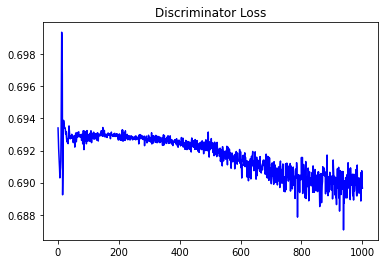

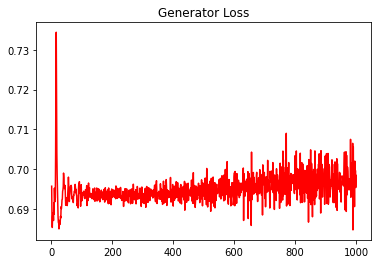

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2811920007996626


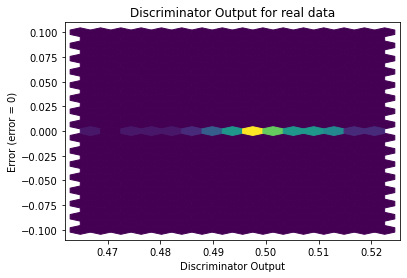

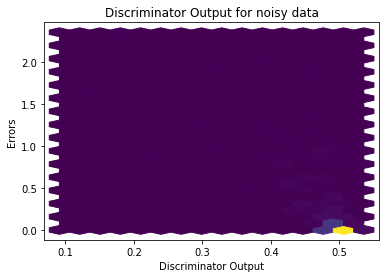

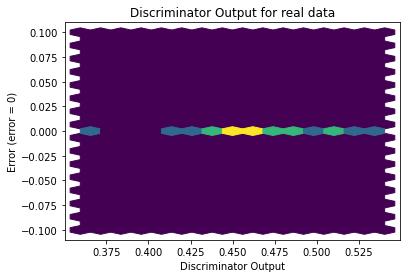

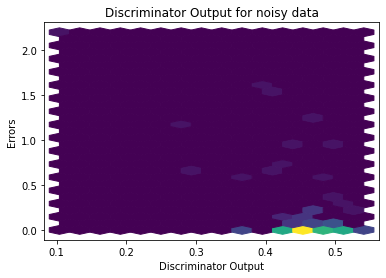

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4225]], requires_grad=True)
